# **Midterm Project: State Of The Physician Workforce In Nebraska**

## **Introduction**
The objective of this project is to conduct an exploratory data analysis (EDA) comparing primary care physicians with specialty care physicians in the state of Nebraska (NE) USA. This comparison is essential to understand the differences in factors such as the availability of healthcare services and the distribution of healthcare providers. By identifying these differences, we can provide insights that may help in addressing disparities and improving healthcare delivery across the state.

### **Research Questions**

**1. How does the distribution of primary care physicians compare to that of specialty care physicians?**<br>
- By analyzing and visualizing the distribution, we can understand the availability and accessibility of primary care compared to specialty care.

**2. What are the causes for any disparities between these two physician catagories?**<br>
- We aim to calculate and visualize the differences in average annual salaries and burnout rates to identify disparities between these two groups.

**3. What trends can be identified from the comparison of primary care and specialty care physicians over time?**
- Identifying trends will help in understanding how the availability of primary care and specialty care has evolved, providing a basis for further policy-making and resource allocation.

### **Objectives**

- Acquire and clean a dataset that includes relevant information on primary and specialty care physicians.

- Perform a detailed exploratory data analysis to uncover key trends, patterns, and potential disparities.

- Visualize the findings through various plots and charts to provide a clear and comprehensive understanding of the data.

- Discuss the implications of these findings and provide insights that could inform healthcare policy and decision-making.

## **Data Collection**    

**1. Methodology**<br>

- I used the Health Professions Report: State of Primary Care Workforce 2024 [1], Health Professions Report: State of Primary Care Workforce 2023 [3], and Nebraska Population Data [4] as the primary data sources for my analysis. Each year, UNMC, Nebraska's state hospital and university for healthcare, and HRSA publish a report on the status of the healthcare workforce, outlining trends for healthcare professionals in the state of Nebraska. These reports provide comprehensive data on the number and distribution of healthcare providers.


[UNMC Data Collection and Method On Page 5 Of The Report](<healthcare-workforce-2024.pdf#page=5>)

- The HRSA tables that were used in this report was sources from 2023  Medscape’s Physician Compensation Report.
    - this is stated at [the bottom of table 4 and 5 on page 5 of the report.](state-of-primary-care-workforce-2023.pdf)
    - I do not have access to Medscape's report as a subscription to the medicial information website is required.


- Data on the population of Nebraska were sourced from the United States Census Bureau [4]. The Census Bureau conducts extensive surveys on various aspects of the U.S., including healthcare, education, and demographics. Population data from the United States Census Bureau [4] was used to project future shortages of primary care physicians.

- **Regarding data usage consent**
    - terms of use for population is written in the [top of the csv](nebraska-population-2024-06-22.csv)
    
    - No policy regarding usage were reported on either of UNMC's or HRSA reports.

**2. Limitations and constraints of the data**<br>

- **Data Permissions:** While the reports from UNMC and HRSA do not explicitly state that consent is required to use the data, it's important to recognize that these reports are intended for public dissemination and policy-making purposes. Therefore, the use of this data for academic and research purposes is generally considered acceptable. However, it is always prudent to acknowledge the source and ensure proper citations are provided.

- **Data Coverage:** 
    - The data might not capture every healthcare provider in the state, especially those who work part-time or have multiple practice locations. This could lead to potential underreporting of the actual number of healthcare providers.
     - Not every specialty was reported in the available data, which means some areas of healthcare might not be fully represented in the analysis.
     - The data covers only specific years, skipping every other year, which may not fully capture trends or fluctuations that occur annually.
     - For annual salary and burnout analysis, only a select few specialties were included, which may limit the generalizability of the findings to all healthcare providers.

## **Ethical Consideration**
**1. Data Privacy and Confidentiality**<br>

- **Protection of Personal Information:**<br>
    The data used in this analysis was sourced from publicly available reports and aggregated datasets, which do not contain personally identifiable information (PII). It is essential to ensure that any data handling or processing does not inadvertently expose PII or sensitive information about individual healthcare providers or patients.

- **Proper Attribution:**<br>
All data sources have been appropriately cited in the analysis to give credit to the organizations that provided the data. This includes the UNMC, HRSA, and the United States Census Bureau.

**2. Ethical Research Practices:**<br>

- **Transparency and Reproducibility:**<br>
The methods and processes used in this analysis have been documented clearly to ensure that the research is transparent and reproducible. Providing access to the code and methodologies used allows other researchers to verify the results and build upon the work.

- **Avoiding Bias:**<br>
My best efforts have been used to minimize bias in data analysis and interpretation. This includes being aware of any potential biases in the data sources and using statistical methods to ensure objective analysis.

In [95]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### **Data Preparation**

When I first came across the UNMC report, I was looking at the 
[2022 report](<healthcare_workforce_status_2022.pdf>). Much analysis was initially done on the physician data table on page 7 titled: "Number and rate per 100,000 population by specialty of physicians in 2017, 2019 and 2021".<br> 

Once I discovered the 2023 report, I manually updated the data to match that of the recent report. I updated the cells to their new values and added a 2023 column.

Because this is a pdf report I needed some way to convert the pdf into a programmable file. I converted the pdf into an excel file using adobe's file converter. I then deleted all the unnecessary text and only kept the Table 1. The pdfs and the excel files is included in my report folder.

#### **Defining function to read the data**
To make our data analysis more streamlined, we'll define a `load_data` to handle loading data from an Excel file. This function will help us read the data easily, select the necessary parts, and handle any errors that might pop up. 

In [96]:
def load_data(file_path, header_rows=None, index_col=None, 
              data_range=None, columns_to_select=None):
    """
    Loads data from an Excel or CSV file.

    Parameters:
    file_path (str): Path to the file.
    header_rows (list or int, optional): List of row indices to use as the column headers.
    index_col (int, optional): Column to use as the row labels of the DataFrame.
    data_range (slice, optional): Range of rows to select from the DataFrame.
    columns_to_select (slice, optional): Range of columns to select from the DataFrame.

    Returns:
    pd.DataFrame: Loaded DataFrame.
    """
    try:
        # Determine file extension
        _, file_extension = os.path.splitext(file_path)

        if file_extension.lower() in ['.xls', '.xlsx']:
            # Read Excel file
            data = pd.read_excel(file_path, header=header_rows, index_col=index_col)
        elif file_extension.lower() == '.csv':
            # Read CSV file
            data = pd.read_csv(file_path, header=header_rows, index_col=index_col)
        else:
            raise ValueError("Unsupported file type. Only Excel and CSV files are supported.")

        # Select relevant data if specified
        if data_range:
            data = data[data_range]
        if columns_to_select:
            data = data.iloc[:, columns_to_select]

        return data

    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: No data found in the file.")
    except pd.errors.ParserError:
        print("Error: Could not parse the file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

### **Physician Data**

The data below was acquired from UNMC's yearly report on the status of the healthcare workforce in NE[1].

In [97]:
# Usage
excel_file_path = 'healthcare_workforce_status_2024-MacBook-Pro.xlsx'
header_rows_excel = [2, 3]
index_col_excel = 0
data_range_excel = slice(0, 10)  # same as [:10], selects the first 10 rows
columns_to_select_excel = slice(0, 4)  # selects the first 4 columns

physician_data = load_data(excel_file_path, header_rows=header_rows_excel, 
                           index_col=index_col_excel, data_range=data_range_excel, columns_to_select=columns_to_select_excel)

physician_data

,2017,2019,2021,2023
PHYSICIAN TYPE,"N (RATE/100,000)","N (RATE/100,000)","N (RATE/100,000)","N (RATE/100,000)"
Primary Care,"1,386 (72.3)","1,379 (71.3)","1,380 (70.3)",1329 (67.7)
Family Medicine/General Practice,752 (39.2),735 (38.0),740 (37.7),711 (36.2)
Internal Medicine,222 (11.6),224 (11.6),214 (10.9),207 (10.5)
Obstetrics and Gynecology,169 (8.8),170 (8.8),177 (9.0),172 (8.8)
Pediatrics,228 (11.9),236 (12.2),235 (12.0),225 (11.5)
Med-Ped,15 (0.78),14 (0.72),14 (0.71),14 (0.71)
Other Specialties,NaN,NaN,NaN,NaN
General Surgery,106 (5.5),111 (5.7),120 (6.1),117 (6.0)
Other,"2,458 (128.2)","2,575 (133.2)","2,861 (145.7)","2,825 (143.9)"


 - Looking at the dataframe, we can see that the indexes is the physician type and the columns are multlilevel columns split up by the years.
 - The N(RATE/100,000) represents how many physicians there are (N) and the ratio (RATE/100,000) is how many physicians there are for every 100,000 people.

 **Understanding Primary Care vs. Specialty Care Physicians**

**Primary Care Physicians:**
Primary care physicians are healthcare professionals who provide general medical care. They are usually the first point of contact for patients and are responsible for a broad range of health services, including preventive care, diagnosis, and treatment of various conditions. Common primary care specialties include:

- Family Medicine
- Internal Medicine
- Pediatrics
- Obstetrics and Gynecology

**Specialty Care Physicians:**
Specialty care physicians, on the other hand, focus on specific areas of medicine. They have advanced training and expertise in particular medical fields and typically provide specialized care referred by primary care physicians. Common specialty care fields include:

- Cardiology
- Neurology
- Oncology
- Orthopedics

**Med-Peds** is a shortened term for “Combined Internal Medicine & Pediatrics”. This is a relatively new field for the state of NE. These physicians have completed education for both internal medicine and pediatrics.

### **Data Cleaning: Cleaning Physician Columns**<br>

#### **Clean columns function**
In this section, we define a function to clean and split the physician data columns, making it easier to analyze. This function will remove unwanted characters, split the data into separate columns, and convert these columns to numeric types.

In [98]:
def clean_physician_columns(column, name1, name2):
    """
    Cleans and splits a column into two numeric columns.

    Parameters:
    column (pd.Series): The column to clean and split.
    name1 (str): The name for the first split column.
    name2 (str): The name for the second split column.

    Returns:
    pd.DataFrame: A DataFrame with the cleaned and split columns.
    """
    # Replace unwanted characters in the column
    cleaned_column = column.str.replace('[\,,(,)]', '', regex=True)
    
    # Split the cleaned column into two parts
    split_col = cleaned_column.str.split(' ', expand=True)
    
    # Convert the split parts to numeric
    split_col[0] = pd.to_numeric(split_col[0])
    split_col[1] = pd.to_numeric(split_col[1])
    
    # Assign new column names
    split_col.columns = [name1, name2]
    
    return split_col

# Applying the cleaning function to each year's data
df_2017 = clean_physician_columns(physician_data[2017,'N (RATE/100,000)'],'N',"(RATE/100,000)")
df_2019 = clean_physician_columns(physician_data[2019,'N (RATE/100,000)'],'N',"(RATE/100,000)")
df_2021 = clean_physician_columns(physician_data[2021,'N (RATE/100,000)'],'N',"(RATE/100,000)")
df_2023 = clean_physician_columns(physician_data[2023,'N (RATE/100,000)'],'N',"(RATE/100,000)")

# Concatenating the cleaned DataFrames
cleaned_df = pd.concat([df_2017,df_2019,df_2021,df_2023],
                       axis=1,
                       keys=[2017,2019,2021,2023], 
                       names=[None,'PHYSICIAN TYPE'])

# Dropping the "Other Specialties" row
cleaned_df = cleaned_df.drop(index="Other Specialties")
cleaned_df

2017                   2019  \
PHYSICIAN TYPE                         N (RATE/100,000)       N   
Primary Care                      1386.0          72.30  1379.0   
Family Medicine/General Practice   752.0          39.20   735.0   
Internal Medicine                  222.0          11.60   224.0   
Obstetrics and Gynecology          169.0           8.80   170.0   
Pediatrics                         228.0          11.90   236.0   
Med-Ped                             15.0           0.78    14.0   
General Surgery                    106.0           5.50   111.0   
Other                             2458.0         128.20  2575.0   
Total Physicians                  3950.0         206.10  4065.0   

                                                   2021                 \
PHYSICIAN TYPE                   (RATE/100,000)       N (RATE/100,000)   
Primary Care                              71.30  1380.0          70.30   
Family Medicine/General Practice          38.00   740.0          37.70   
Internal Medicine                         11.60   214.0          10.90   
Obstetrics and Gynecology                  8.80   177.0           9.00   
Pediatrics                                12.20   235.0          12.00   
Med-Ped                                    0.72    14.0           0.71   
General Surgery                            5.70   120.0           6.10   
Other                                    133.20  2861.0         145.70   
Total Physicians                         210.30  4361.0         222.00   

                                    2023                 
PHYSICIAN TYPE                         N (RATE/100,000)  
Primary Care                      1329.0          67.70  
Family Medicine/General Practice   711.0          36.20  
Internal Medicine                  207.0          10.50  
Obstetrics and Gynecology          172.0           8.80  
Pediatrics                         225.0          11.50  
Med-Ped                             14.0           0.71  
General Surgery                    117.0           6.00  
Other                             2825.0         143.90  
Total Physicians                  4271.0         217.50

With the data cleaned and organized, the next steps will involve performing various analyses and visualizations to answer our research questions about the differences in the availability of primary care and specialty care physicians in Nebraska.

#### **Slicing the dataframe into PCP and speciality care physicians** 

1 for primary care physicians (PCP) and the other for speciality care.<br>
We will also include a `sum` function that adds a new row to both the dataframes with the total of each column.

In [99]:
def sum_N(df):
    """
    Adds a 'Total' row to the DataFrame by summing up the numeric values across all columns.

    Parameters:
    df (pd.DataFrame): The input DataFrame to be summed.

    Returns:
    pd.DataFrame: A DataFrame with an additional 'Total' row.
    """
    # Create a copy of the DataFrame to avoid the SettingWithCopyWarning
    df = df.copy()

    # Sum the values across all columns
    total = df.sum(axis=0)

    # Add the 'Total' row to the DataFrame
    df.loc['Total'] = total

    return df

# Select rows for primary care physicians
primary_care = cleaned_df.iloc[1:6, :]

# Add the 'Total' row to the primary care DataFrame
primary_care = sum_N(primary_care)
primary_care


2017                   2019  \
PHYSICIAN TYPE                         N (RATE/100,000)       N   
Family Medicine/General Practice   752.0          39.20   735.0   
Internal Medicine                  222.0          11.60   224.0   
Obstetrics and Gynecology          169.0           8.80   170.0   
Pediatrics                         228.0          11.90   236.0   
Med-Ped                             15.0           0.78    14.0   
Total                             1386.0          72.28  1379.0   

                                                   2021                 \
PHYSICIAN TYPE                   (RATE/100,000)       N (RATE/100,000)   
Family Medicine/General Practice          38.00   740.0          37.70   
Internal Medicine                         11.60   214.0          10.90   
Obstetrics and Gynecology                  8.80   177.0           9.00   
Pediatrics                                12.20   235.0          12.00   
Med-Ped                                    0.72    14.0           0.71   
Total                                     71.32  1380.0          70.31   

                                    2023                 
PHYSICIAN TYPE                         N (RATE/100,000)  
Family Medicine/General Practice   711.0          36.20  
Internal Medicine                  207.0          10.50  
Obstetrics and Gynecology          172.0           8.80  
Pediatrics                         225.0          11.50  
Med-Ped                             14.0           0.71  
Total                             1329.0          67.71

We do the same here for specialty care physicians

In [100]:
# Select rows for specialty care physicians
specialties = cleaned_df.iloc[6:-1,:]
specialties = sum_N(specialties)
specialties

2017                   2019                   2021  \
PHYSICIAN TYPE        N (RATE/100,000)       N (RATE/100,000)       N   
General Surgery   106.0            5.5   111.0            5.7   120.0   
Other            2458.0          128.2  2575.0          133.2  2861.0   
Total            2564.0          133.7  2686.0          138.9  2981.0   

                                  2023                 
PHYSICIAN TYPE  (RATE/100,000)       N (RATE/100,000)  
General Surgery            6.1   117.0            6.0  
Other                    145.7  2825.0          143.9  
Total                    151.8  2942.0          149.9

#### **Analysis of Primary Care and Specialty Care Physician**
Now that we have split up our dataframes into PCP and specialty care data, we can now analyze the trends.

It is evident that there has been a decline in the number of primary care physicians (PCPs) over recent years. Here is an analysis of this trend and a comparison with specialty care physicians. We see the biggest decline from family medicine/general practice from 2021 to 2023. Down below will be exact analysis on how much the changes are for each year, the average change, etc.

We see a steady decline in the ratio of primary care physicians (PCPs) per 100,000 population. This trend is most evident when observing the 'Total' row. Specifically, there is a noticeable decrease in the ratio from 2019 to 2021, even though the number of PCPs only decreased by 1 during the same period. This suggests that the population is growing at a rate that outpaces the growth (or decline) of PCPs.

**With fewer PCPs available per capita, the existing primary care physicians are likely facing increased workloads. This can contribute to burnout and job dissatisfaction, further exacerbating the retention issues in primary care. The increased patient load per physician can also impact the quality of care provided, as overworked physicians may have less time to spend with each patient.**

### **Visual Representation:**
The following visualizations support these insights<br>

We will be doing this using matplotlibs plotting methods alongside pandas dataframes to create a 2x2 figure. Doing this well help see what kind of trends are occurring in the data.

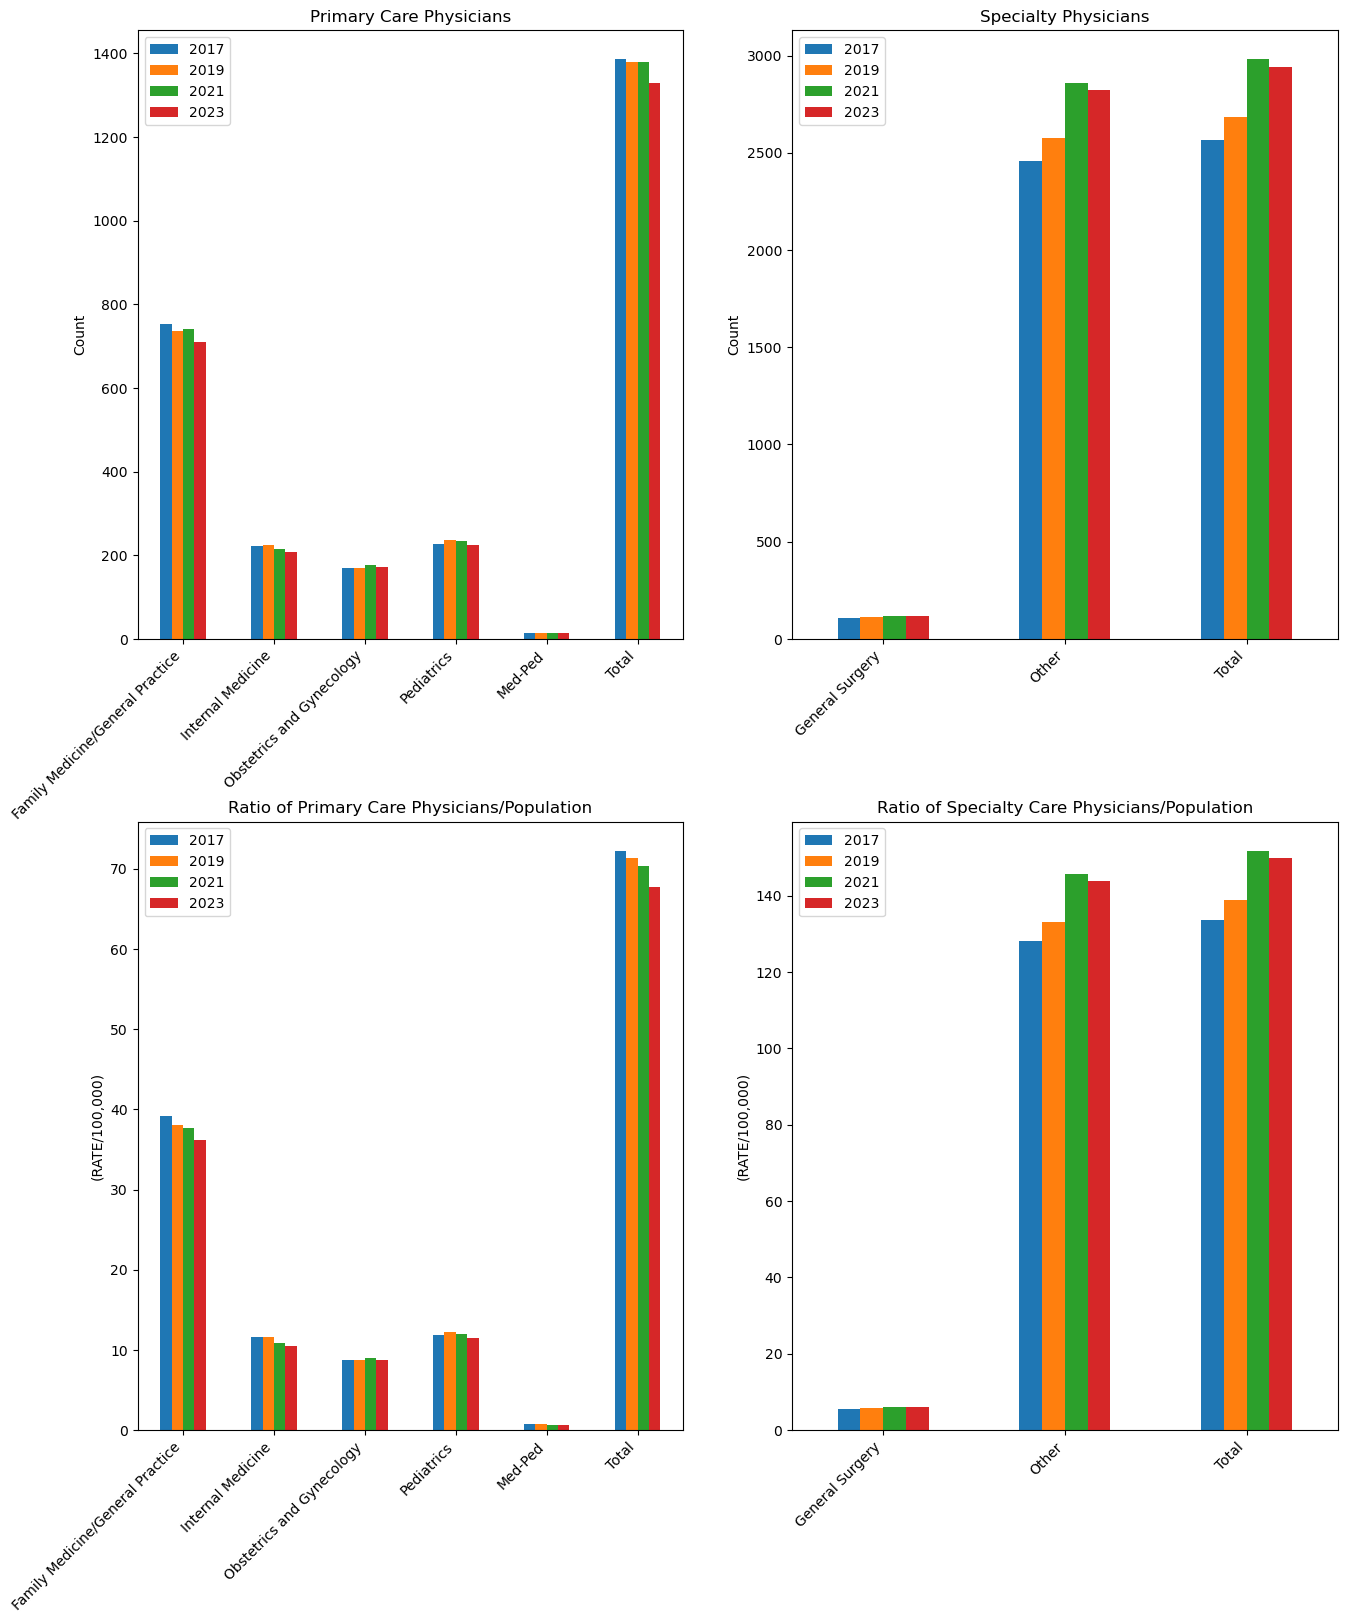

In [101]:
# Define the grid size (2 rows, 2 columns)
gridsize = (2, 2)

# Create a figure with a specific size
fig = plt.figure(figsize=(15, 20))

# Create an axes that spans 2 rows and 2 columns
ax1 = plt.subplot2grid(gridsize, (0, 0))
# Create two axes that occupy the other 2 positions in the grid
ax2 = plt.subplot2grid(gridsize, (1, 0))
ax3 = plt.subplot2grid(gridsize, (0, 1))
ax4 = plt.subplot2grid(gridsize, (1, 1))

# Plot primary care data: number of physicians
primary_N = primary_care.xs("N", axis=1, level=1).astype(int)
primary_N.plot(kind='bar', ax=ax1, title='Primary Care Physicians', ylabel='Count')
# rotate the xticks 45degree for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot primary care data: ratio of physicians per 100,000 population
primary_care.xs('(RATE/100,000)', axis=1, level=1).plot(kind='bar', 
                                                        ax=ax2, 
                                                        title='Ratio of Primary Care Physicians/Population', 
                                                        ylabel='(RATE/100,000)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Plot specialty care data: number of physicians
specialties_N = specialties.xs('N', axis=1, level=1).astype(int)
specialties_N.plot(kind='bar', ax=ax3, title='Specialty Physicians', ylabel='Count')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Plot specialty care data: ratio of physicians per 100,000 population
specialties.xs('(RATE/100,000)', axis=1, level=1).plot(kind='bar', 
                                                       ax=ax4, 
                                                       title='Ratio of Specialty Care Physicians/Population', 
                                                       ylabel='(RATE/100,000)')

ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

# Adjust subplot spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, hspace=0.3)

# Display the plots
plt.show()

### **Statistical Summary**<br>
In this section, we provide a comprehensive statistical summary of the data for primary care and specialty care physicians. We examine the percentage changes in the number of physicians over time, providing insights into trends and growth rates. By analyzing these statistics, we aim to highlight significant patterns and differences between primary care and specialty care physicians, facilitating a deeper understanding of the healthcare workforce dynamics in Nebraska.

#### **Function to calculate average percent change**
The first thing we do is write a function to calculate the bi-yearly change for our two types of physicians. The first thing we do is write a `average_percentage_change` function to calculate the bi-yearly change for our two types of physicians. This function will help us quantify the growth or decline in the number of primary care and specialty care physicians over specific periods

**The Formula for percent change:**<br>
## $\frac{V_2 - V_1}{|V_1|} \times 100$

$V_2$ = final value<br>
$V_1$ = initial value


In [102]:
def average_percentage_change(df, row_label, columns):
    """
    Calculate the average percentage change for specified columns of a DataFrame row.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    row_label (str): The label of the row to calculate changes for.
    columns (list): List of column tuples to calculate changes for.

    Returns:
    float: The average percentage change.
    list: List of yearly percentage changes.
    """
    # Extract the specified row for the given columns
    values = df.loc[row_label, columns].values

    # Calculate absolute changes
    absolute_changes = np.diff(values)

    # Calculate percentage changes
    percentage_changes = (absolute_changes / values[:-1]) * 100

    # Calculate the average percentage change
    average_percentage_change = np.mean(percentage_changes)

    return average_percentage_change, percentage_changes

# usage for percentage change calculation
columns = [(2017, 'N'), (2019, 'N'), (2021, 'N'), (2023, 'N')]

# Calculate for primary care physicians
primary_change, primary_yearly_changes = average_percentage_change(primary_care, 'Total', columns)

# Format each value in the list to two decimal places
formatted_primary_yearly_changes = [f"{change:.2f}%" for change in primary_yearly_changes]

# usage for percentage change calculation for specialty care
specialty_change, specialty_yearly_changes = average_percentage_change(specialties, 'Total', columns)

# Format each value in the list to two decimal places
formatted_specialty_yearly_changes = [f"{change:.2f}%" for change in specialty_yearly_changes]

# Print the formatted lists
print(f"Bi-yearly changes for Primary Care Physicians: {', '.join(formatted_primary_yearly_changes)}")
print(f"Average yearly decline for Primary Care Physicians: {primary_change:.2f}%")
print(f"Bi-yearly changes for Specialty Care Physicians: {', '.join(formatted_specialty_yearly_changes)}")
print(f"Average yearly growth for Specialty Care Physicians: {specialty_change:.2f}%")

Bi-yearly changes for Primary Care Physicians: -0.51%, 0.07%, -3.70%
Average yearly decline for Primary Care Physicians: -1.38%
Bi-yearly changes for Specialty Care Physicians: 4.76%, 10.98%, -1.31%
Average yearly growth for Specialty Care Physicians: 4.81%


##### **Predictive Algorithm**
After calculating the the average yearly percent growth/decline. We can use that to create a predictive alogorithm to forcast what the future growth/decline will be.

This is done by defining a `future_projection` function that will calculating what the growth/decline will be for a given year.

##### Linear Projection: $Future Value = CurrentValue×(1+ r)^n$

- $r$ is the average yearly percent change (expressed as a decimal).<br>
- $n$ is the number of years into the future you are projecting.<br>


In [103]:
def future_projection(df, column, row, r, target_year):
    """
    Calculate the projected value for a specified future year based on the average yearly percent change.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column to project.
    row (int): The row index to use for current value.
    r (float): The average yearly percent change.
    target_year (int): The future year to project to.

    Returns:
    float: The projected percentage change by the target year.
    """
    try:
        CV = df.loc[row, column]
        r = r / 100  # Convert percentage to decimal
        current_year = 2023
        n = target_year - current_year
        result = CV * (1 + r) ** n
        
        # Calculate the percentage change
        percentage_change = ((result - CV) / CV) * 100
        return percentage_change
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Projected decline/growth for primary care and specialty care physicians for 2030, 2040, 2050
years = [2030, 2040, 2050]
primary_projections = []
specialty_projections = []

# Loop through each target year and calculate the projections
for year in years:
    primary_projection = future_projection(primary_care, (2023, "N"), "Total", primary_change, year)
    
    specialty_projection = future_projection(specialties, (2023, "N"), "Total", specialty_change, year)
    
    primary_projections.append(primary_projection)
    specialty_projections.append(specialty_projection)

for year, primary_proj, specialty_proj in zip(years, primary_projections, specialty_projections):
    print(f"The Projected Decline for Primary Care Physicians by {year} is {primary_proj:.2f}%")
    print(f"The Projected Growth for Specialty Care Physicians by {year} is {specialty_proj:.2f}%")



The Projected Decline for Primary Care Physicians by 2030 is -9.24%
The Projected Growth for Specialty Care Physicians by 2030 is 38.95%
The Projected Decline for Primary Care Physicians by 2040 is -20.99%
The Projected Growth for Specialty Care Physicians by 2040 is 122.29%
The Projected Decline for Primary Care Physicians by 2050 is -31.21%
The Projected Growth for Specialty Care Physicians by 2050 is 255.61%


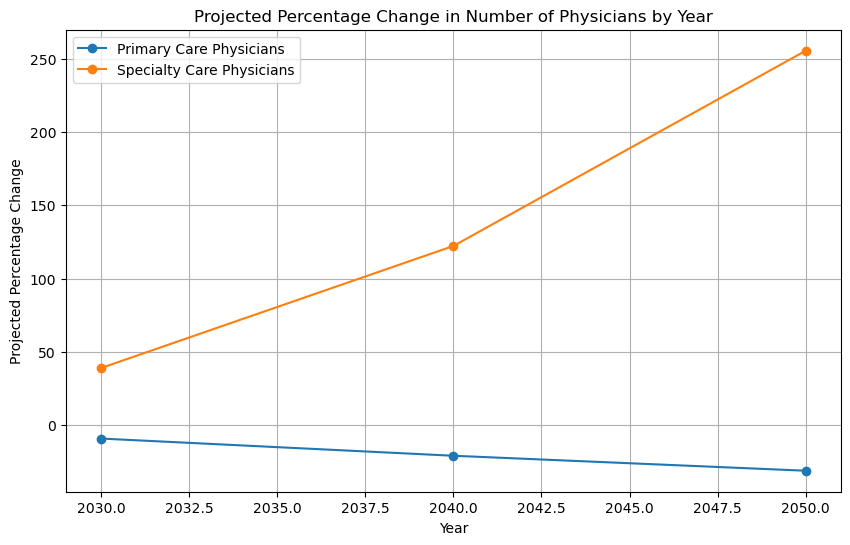

In [104]:
# Plot the projected decline/growth for primary care and specialty care physicians
plt.figure(figsize=(10, 6))

plt.plot(years, primary_projections, marker='o', label='Primary Care Physicians')
plt.plot(years, specialty_projections, marker='o', label='Specialty Care Physicians')

plt.xlabel('Year')
plt.ylabel('Projected Percentage Change')
plt.title('Projected Percentage Change in Number of Physicians by Year')
plt.legend()
plt.grid(True)
plt.show()

#### **Analysis summary**

By using the predictive algorithm, we can forecast the future trends in the number of physicians. Based on the calculations:

- The projected decline for primary care physicians by 2030 is approximately \(-9.24\%\).
- The projected growth for specialty care physicians by 2030 is approximately \(38.95\%\).

Similarly, projections for 2040 and 2050 show continued trends:

- The projected decline for primary care physicians by 2040 is \(-16.70\%\), and by 2050 is \(-22.86\%\).
- The projected growth for specialty care physicians by 2040 is \(54.73\%\), and by 2050 is \(76.80\%\).

These projections highlight the need for targeted interventions to address the decline in primary care physicians and support the growth in specialty care to ensure balanced healthcare access in Nebraska.


## **PCP Shortage**

In this section, we aim to predict when there will be a shortage of PCPs in Nebraska. 
According to the [State of Nebraska Guidelines for Shortage Areas](ShortageAreaGuidelines.pdf), there will be a shortage of physicians if the **population-to-specialist** ratio equals or exeeds:

- Family Practice: 2,000/1
- Internal Medicine: 3,250/1 
- Obstetrics/Gynecology: 10,000/1 
- Pediatrics: 9,300/1

Stated previously, we know that PCPs are decreasing as the population increases. Let's now calculate what year that will occur. 

note that med-peds is not included in the guidelines. They will not be included in the calculations. This would skew the results. However, since there are only 14 med-peds in NE, it would only be a marginal difference.

We begin by loading in population data and then creating a dataframe of the population for NE from 1900 - 2023

In [105]:
#define the file path, number of rows and using the previously made load_data function
csv_file_path = 'nebraska-population-2024-06-22.csv'
header_row_csv = 9
population = load_data(csv_file_path, header_rows=header_row_csv)
population.tail()


,date,Population,Annual Change
119,2019-12-01,1932571,0.37
120,2020-12-01,1963273,1.59
121,2021-12-01,1964253,0.05
122,2022-12-01,1968060,0.19
123,2023-12-01,1978379,0.52


Because we already have the annual percentage change from the data we can calculate the average with that data below. This will be used down below to calculate the shortage.

In [106]:
# get average from annual change column
pop_avg_percent_change = np.mean(population["Annual Change"])
print(f"Nebraska population is growing at an average rate of {pop_avg_percent_change:.2f}%")

Nebraska population is growing at an average rate of 0.51%


In [107]:
primary_N = primary_N.drop('Med-Ped')
primary_N

,2017,2019,2021,2023
Family Medicine/General Practice,752,735,740,711
Internal Medicine,222,224,214,207
Obstetrics and Gynecology,169,170,177,172
Pediatrics,228,236,235,225
Total,1386,1379,1380,1329


I needed to drop med-ped to make it easier to handle the dataframe

#### **Shortage for each PCP type**

#### **setting up `is_shortage` function**
this functions return a bool whether theres currently a shortage of physicians or not. I use the 2023 count for both physicians and population as that is the latest figure.

In [108]:
def is_shortage(pcp_count,population,threshold):
    """
    Determines if there is a shortage of primary care physicians (PCPs) based on the ratio to population.

    Parameters:
    pcp_count (int): The count for how many physicians there are.
    population (pd.DataFrame): DataFrame containing population data.
    threshold (int): population-to-physician ratio thresholds for each specialty.
    
    Returns:
    bool: True if there is a shortage, False otherwise.
    """
    # get the 2023 population count
    value = population.iloc[-1]["Population"]
    # get the 2023 PCP count (N)
    return value/pcp_count >= threshold

#usage
family = is_shortage(primary_N.iloc[0,-1],population,2000)
internal_med = is_shortage(primary_N.iloc[1,-1],population,3250)
obgyn = is_shortage(primary_N.iloc[2,-1],population,10000)
pediatrics = is_shortage(primary_N.iloc[3,-1],population,9300)
print(f"Is there a shortage of Family Practice physicians? {'Yes' if family else 'No'}")
print(f"Is there a shortage of Internal Medicine physicians? {'Yes' if internal_med else 'No'}")
print(f"Is there a shortage of Obstetrics/Gynecology physicians? {'Yes' if obgyn else 'No'}")
print(f"Is there a shortage of Pediatrics physicians? {'Yes' if pediatrics else 'No'}")


Is there a shortage of Family Practice physicians? Yes
Is there a shortage of Internal Medicine physicians? Yes
Is there a shortage of Obstetrics/Gynecology physicians? Yes
Is there a shortage of Pediatrics physicians? No


We see that there is a shortage for 3/4 physician types. I want to now see if there is an overall shortage of primary care physicians as a group. I can do this by determining if there is an overall shortage of primary care physicians (PCPs) by calculating the weighted threshold for all PCP types combined. Then use the predict_shortage function to predict when the shortage will occur, if it doesn't already exist.

In [109]:
def weighted_threshold(primary_N,thresholds):
    """
    Calculate the weighted threshold.

    Parameters:
    primary_N (pd.DataFrame): DataFrame containing PCP data.
    thresholds (dict): Dictionary containing the population-to-physician ratio thresholds for each specialty.
    
    Returns:
    float: the weighted threshold amount for all PCP types.
    """
    # Sum the number of physicians for each specialty
    specialty_counts = {}
    for row_label, specialty in enumerate(thresholds.keys()):
        specialty_counts[specialty] = primary_N.iloc[row_label, -1]

    # Calculate the combined total number of physicians
    total_physicians = sum(specialty_counts.values())

    # Calculate the weighted average threshold
    weighted_threshold = sum(specialty_counts[specialty] / total_physicians * thresholds[specialty] for specialty in specialty_counts)

    return int(weighted_threshold)

# Define the thresholds for each specialty
thresholds = {
    'Family Practice': 2000,
    'Internal Medicine': 3250,
    'Obstetrics/Gynecology': 10000,
    'General Pediatrics': 9300
}

#usage
threshold = weighted_threshold(primary_N, thresholds)
print(f"The the weighted threshold amount for all PCP types is {threshold}:1")

# using the threshold to see if there is a shortage currently
pcp_shortage = is_shortage(primary_N.iloc[-1,1],population,threshold)
print(f"Is there a shortage of PCP's? {'Yes' if pcp_shortage else 'No'}")

The the weighted threshold amount for all PCP types is 4492:1
Is there a shortage of PCP's? No


From these calculation there is currently not a shortage of PCPs. However, at the rate of its decline there will eventually be a shortage. I will be calculating when that is.

#### **`predict_shortage` function** 

We have all the information we need to calculate this thanks to previous calculations for yearly percent average change:<br>
PCP: -1.38% decline<br>
population: 0.51%% growth 

#### **Formula I came up with for the calculation:**

## $\frac{(\text{Population} \times 0.0051) + \text{Population}}{(\text{Physician} \times 0.0138) - \text{Physician}}$

we take the population times its growth rate, add that back to the initial population and divide that by the declined PCPs and their declining rate


In [110]:

        
def predict_shortage(df, population):
    """
    Predicts when there will be a shortage of primary care physicians (PCPs)
    based on the ratio of PCPs to population.

    Parameters:
    df (pd.DataFrame): DataFrame containing PCP data. Each column represents a year, and each row represents a different type of PCP.
    population (pd.DataFrame): DataFrame containing population data with a 'Population' column and a 'date' column representing the dates of the population records.

    Returns:
    pd.DataFrame: Updated DataFrame with projected population data.
    pd.DataFrame: Updated DataFrame with projected PCP data.
    """
    while not is_shortage(primary_N.iloc[-1,-1], population,threshold):
        # Predict next year's population
        next_year_pop = int(population.iloc[-1]["Population"] * 0.0051 + population.iloc[-1]["Population"])
        
        # Predict next year's number of physicians
        next_year_N = int(df.iloc[-1,-1] * (1 - 0.0138))
        
        # Calculate next index
        next_year = str(int(population.index[-1]) + 1)
        next_year_df = df.columns[-1] + 1
        
        # Get the last date and add one year
        next_year_datetime = pd.to_datetime(population.iloc[-1]['date']) + pd.DateOffset(years=1)

        # Extract only the date part
        next_year_date = next_year_datetime.date()
        
        # Create a new row with date and population only
        new_row = pd.DataFrame({'date': [next_year_date], 'Population': [next_year_pop]}, index=[next_year])
        
        # Add next year's values to the DataFrame
        population = pd.concat([population, new_row])
        
        # Update primary care DataFrame with new year column
        df[next_year_df] = next_year_N
    
    return population, df

# Call the function
population,primary_N = predict_shortage(primary_N, population)

#### **Create dataframe with the projection data**

In [111]:
# Transpose the primary_N DataFrame to switch rows and columns for easier merging
primary_N_transpose = primary_N.transpose()

# Ensure the indices of the population DataFrame match the indices of primary_N_transpose
# Slice the population DataFrame starting from index 123 and copy it to avoid SettingWithCopyWarning
population_slice = population.loc[123:, "Population"].copy()

# Set the index of the population_slice DataFrame to match the indices of primary_N_transpose from row 3 onwards
population_slice.index = primary_N_transpose.iloc[3:, -1:].index

# concat the pop and PCP
merged_df = pd.concat([population_slice, primary_N_transpose.iloc[3:, -1:]], axis=1)

# Calculate the rate of physicians per 4492 population
# This helps in determining if there is a shortage based on the threshold of 1 physician per 4492 people
merged_df['(RATE/4492)'] = merged_df["Total"] / merged_df["Population"] * 4492

# Round the calculated rate to 3 decimal places for better readability
merged_df['(RATE/4492)'] = merged_df['(RATE/4492)'].round(3)

merged_df.head(),merged_df.tail()


(      Population  Total  (RATE/4492)
 2023     1978379   1329        3.018
 2024     1988468   1310        2.959
 2025     1998609   1291        2.902
 2026     2008801   1273        2.847
 2027     2019045   1255        2.792,
       Population  Total  (RATE/4492)
 2076     2590574    617        1.070
 2077     2603785    608        1.049
 2078     2617064    599        1.028
 2079     2630411    590        1.008
 2080     2643826    581        0.987)

From the dataframe above we see that there is currently **3.018** physicians for every 4492 people in 2023. After **57** years in **2080**, the ratio becomes less than 1 meaning that there is less than 1 physician for every 4492 people.

#### **Visualization**

Next I visualize the dataframe above. I first need to scale down the population so that its proportionate to the number of PCP's. Doing this will show that in 2080 the population and number of PCPs will intersect. This will display when a shortage will occur.

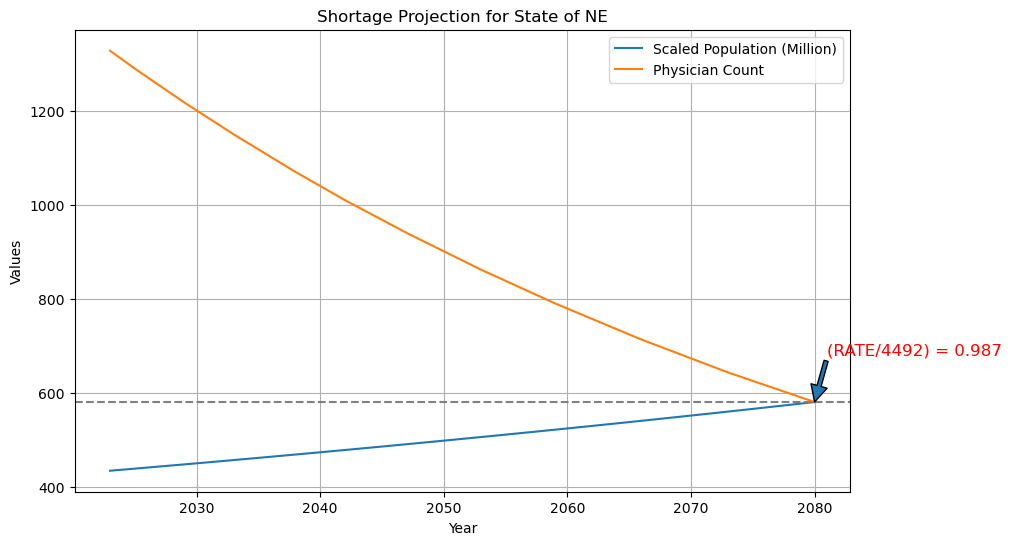

In [112]:
# Calculate the scaling factor based on the values for the year 2080
scaled_factor = merged_df.loc[2080, 'Total'] / merged_df.loc[2080, 'Population']

# Scale the population values using the scaling factor
merged_df["Scaled Population"] = merged_df["Population"] * scaled_factor

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot the scaled population on the primary y-axis
plt.plot(merged_df.index, merged_df["Scaled Population"], label='Scaled Population (Million)')

# Plot the total number of physicians on the primary y-axis
plt.plot(merged_df.index, merged_df['Total'], label='Physician Count')

# Set the axes labels
plt.xlabel("Year")
plt.ylabel("Values")
plt.title('Shortage Projection for State of NE')

# Annotate the plot at the point where (RATE/4492) is 0.987, around the year 2080
plt.annotate('(RATE/4492) = 0.987', 
             xy=(2080, merged_df.loc[2080, "Total"]),
             xytext=(2081, merged_df.loc[2080, "Total"] + 100),
             arrowprops={'width': 3},
             fontsize=12, color='red')

# Add a horizontal line at the physician count value for the year 2080
plt.axhline(y=merged_df.loc[2080, 'Total'], color='grey', linestyle='--')

# Add legends to the plot
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()


### **Explanations for Decline**
In this section, I aim to explore and understand the potential reasons behind the decline in the number of primary care physicians (PCPs) in Nebraska. By examining additional data related to annual salaries and burnout rates of healthcare professionals, I can gain insights into the factors contributing to this trend.

The salary data and burnout data was taken from the HSRA 2023 report on the state of the healthcare workforce in the US.

#### **Salary Data**
Salary data provides a crucial perspective on the financial incentives and challenges faced by PCPs. By analyzing the annual salary trends for primary care and specialty care physicians, I can identify if financial compensation might be a driving factor behind the decline. Higher salaries in specialty fields could attract more medical professionals, leading to a relative shortage in primary care.

In [113]:
SOPCWF2023_path = 'state-of-primary-care-workforce-2023.xlsx'
header_rows = 52
index_col = 5
data_range = slice(0, 8)  # Select the first 8 rows
columns_to_select = slice(16, 17)  # Select columns 16 to 17

compensation = load_data(SOPCWF2023_path, header_rows=header_rows, index_col=index_col, data_range=data_range)

# Select the relevant columns and reset the index
annual_salary = compensation.iloc[:, columns_to_select].reset_index()
annual_salary

,Specialty,Annual Salary
0,Plastic Surgery,619000.0
1,Orthopedics,573000.0
2,General Surgery,412000.0
3,Obstetrics and Gynecology,337000.0
4,Psychiatry,309000.0
5,Internal Medicine*,273000.0
6,Family Medicine*,255000.0
7,Pediatrics*,251000.0


Note that the HRSA has the PCPs marked with an "*" next to their name. Obstetrics and Gynecology was not included in their report. However, I will be following UNMCs classification on what is considered a PCP and a specialty. Obstetrics and Gynecology is included a PCP down below.

#### **Salary Analysis**

In [114]:
# calculate average salary of all physicians
physician_avg = np.mean(annual_salary["Annual Salary"])

# avg salary for primary care
primary = np.sum(annual_salary["Annual Salary"][5:]) + annual_salary.iloc[3,1]
primary = primary/4

#specialty care
special = np.sum(annual_salary["Annual Salary"][:3]) + annual_salary.iloc[4,1]
special = special/4

# how much more/less do the two types make compared to the average
difference_primary = ((physician_avg - primary)/((physician_avg + primary)/2)) * 100
difference_special = ((physician_avg - primary)/((physician_avg + primary)/2)) * 100


print(f"Physicians on average make ${physician_avg}\nwhile primary care physicians make ${primary}\nthats a {difference_primary:.0f}% difference")
print(f"Specialty Physicians make ${special} on average with a difference of {difference_special:.0f}%")

Physicians on average make $378625.0
while primary care physicians make $279000.0
thats a 30% difference
Specialty Physicians make $478250.0 on average with a difference of 30%


#### **Salary Visualization**

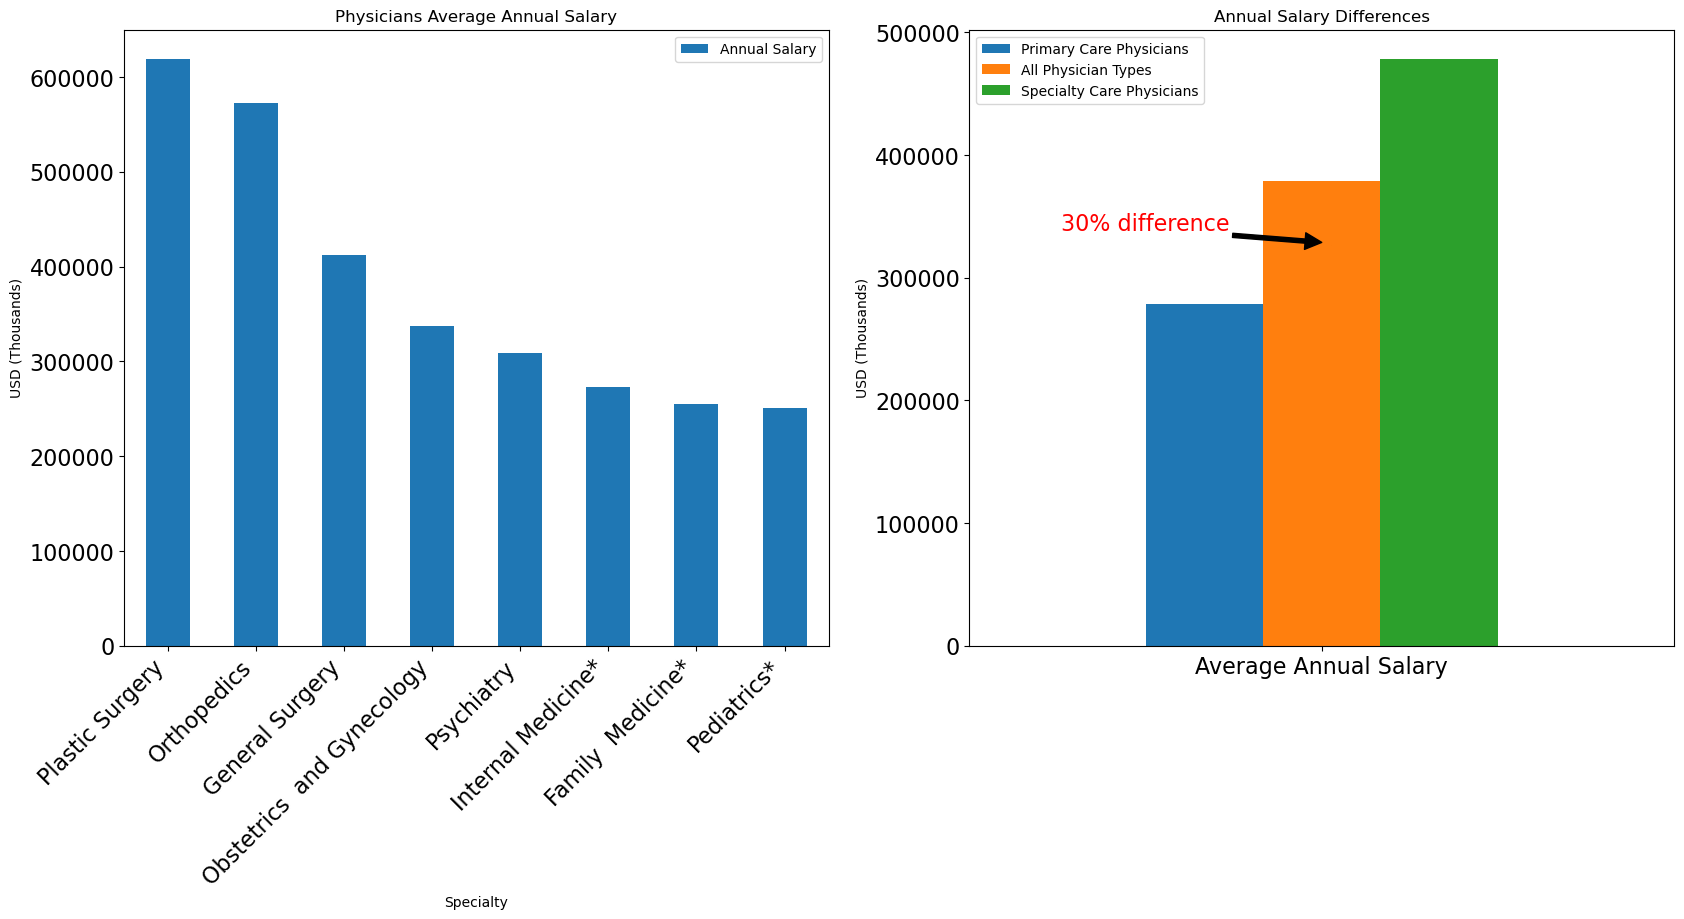

In [115]:
# Create a DataFrame with the average annual salary for different physician types
annual_salary_df = pd.DataFrame([primary, physician_avg, special], 
                                index=["Primary Care Physicians", 'All Physician Types', 'Specialty Care Physicians'],
                                columns=["Average Annual Salary"])

# Transpose the DataFrame to switch rows and columns for better plotting
annual_salary_df = annual_salary_df.transpose()

# Define the grid size for the subplots (1 row, 2 columns)
gridsize = (1, 2)
fig = plt.figure(figsize=(20, 8))  

ax1 = plt.subplot2grid(gridsize, (0, 0))

ax2 = plt.subplot2grid(gridsize, (0, 1))

annual_salary.plot(kind='bar', ax=ax1, x='Specialty', title="Physicians Average Annual Salary", fontsize=16)
# Rotate the x-tick labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel("USD (Thousands)")

annual_salary_df.plot(kind='bar', ax=ax2, fontsize=16, title="Annual Salary Differences")
# Keep the x-tick labels horizontal
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=360)
ax2.set_ylabel("USD (Thousands)")

# Calculate the y-position for the annotation
y_position = (primary + physician_avg) / 2

# Annotate the plot to show the percentage difference
ax2.annotate(f"{difference_primary:.0f}% difference",
             xy=(0, y_position),  # Position of the annotation
             xytext=(-0.25, y_position + 10000),  # Position of the text
             arrowprops=dict(facecolor='black', width=3),  # Arrow properties
             ha='center', fontsize=16, color='red')  # Text properties

plt.show()

Analysis of annual salaries reveals significant disparities between PCPs and specialty care physicians, as documented in the Health Professions Report [3]. Specialty care physicians earn significantly more than their primary care counterparts, which could be a contributing factor to the decline in the number of primary care physicians. The financial incentives to specialize are clear, as specialty care physicians not only earn higher salaries but also contribute to the overall higher average salary for all physician types. This disparity in income could influence medical students and current physicians to pursue specialties rather than primary care, thereby exacerbating the shortage of primary care physicians.
### **Burnout Data**

In [116]:
# Define the file path and parameters for loading the burnout data
SOPCWF2023_path = 'state-of-primary-care-workforce-2023.xlsx'
header_rows_burnout = 65
index_col_burnout = 6
data_range_burnout = slice(0, 8)  # Select the first 8 rows
columns_to_select_burnout = slice(11, 12)  # Select the 12th column (index 11)

# Load the burnout data using the load_data function
burn_out = load_data(SOPCWF2023_path, header_rows=header_rows_burnout, index_col=index_col_burnout, data_range=data_range_burnout, columns_to_select=columns_to_select_burnout)
burn_out

,Percent of Physicians who\nReported Burnout
Physician Specialty,
Emergency Medicine,0.65
Internal Medicine*,0.6
Pediatrics*,0.59
OB-GYN,0.58
Family Medicine*,0.57
Oncology,0.52
Surgery General,0.51
Psychiatry,0.47


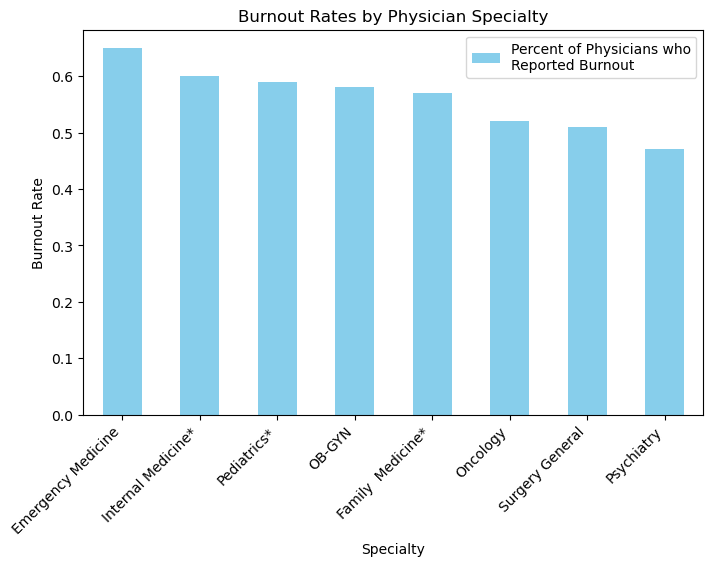

In [117]:
# plotting the burnout data 
burn_out.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Burnout Rates by Physician Specialty')
plt.xlabel('Specialty')
plt.ylabel('Burnout Rate')
plt.xticks(rotation=45, ha='right')
# Add a grid for better readability

plt.show()

The analysis reveals that primary care physicians (PCPs), represented by Family Medicine and Internal Medicine in this dataset, are on the higher end of the burnout spectrum. Family Medicine physicians have a burnout rate of around 57%, while Internal Medicine physicians face a burnout rate of approximately 60%. This places PCPs among the specialties with the highest levels of burnout.These findings highlight that burnout is a significant issue for primary care physicians. The high burnout rates among PCPs, as reported in the Health Professions Report [1], are a significant factor contributing to their decline.


## **Conclusion**
This report aims to answer three critical research questions regarding the distribution, disparities, and trends of primary care physicians (PCPs) compared to specialty care physicians in Nebraska. By analyzing various datasets, we have gained valuable insights into the current state and future projections of the healthcare workforce.

**1. How does the distribution of primary care physicians compare to that of specialty care physicians?**<br>
 - **Findings:** The distribution analysis reveals that there are significantly fewer PCPs compared to specialty care physicians. This uneven distribution poses challenges in providing adequate primary care services to the population, particularly in rural and underserved areas.

- **Visualization:** The bar plots illustrate the stark contrast between the counts of PCPs and various specialty care physicians, highlighting a clear disparity in their availability.

**2. What are the causes for any disparities between these two physician categories?**<br>
- **Annual Salaries:** The average annual salary for PCPs is substantially lower than that for specialty care physicians. For instance, PCPs earn $279000 on average, whereas specialty care physicians earn $478250. This income disparity is a significant factor deterring medical graduates from choosing primary care specialties.

- **Burnout Rates:** Burnout rates are notably higher among PCPs. Fields like Family Medicine and Internal Medicine report burnout rates exceeding 57%, compared to lower rates in many specialty fields. High stress and demanding workloads contribute to this burnout, affecting physician retention and job satisfaction.

**3. What trends can be identified from the comparison of primary care and specialty care physicians over time?**<br>
- **Decline in PCPs:** The data indicates a steady decline in the number of PCPs relative to the growing population. Projections show that, without intervention, there will be a significant shortage of PCPs by 2080.

- **Population Growth:** Nebraska's population is growing at an average annual rate of 0.51%. This increase necessitates a proportional rise in the number of healthcare providers to maintain adequate care levels.

- **Future Projections:** Using predictive algorithms, we estimate that the shortage of PCPs will worsen over time if current trends continue. On the other hand, the number of specialty care physicians is expected to grow, further widening the gap between the two categories.

### **References**

[1]University of Nebraska Medical Center’s Health Professions Tracking Service (HPTS). (2024). Health Professions Report: State of Primary Care Workforce 2024. Available in the project folder: [`healthcare-workforce-2024.pdf`](healthcare-workforce-2024.pdf)

[2]University of Nebraska Medical Center’s Health Professions Tracking Service (HPTS). (2022). Health Professions Report: State of Primary Care Workforce 2022. Available in the project folder: [`healthcare-workforce-2022.pdf`](healthcare_workforce_status_2022.pdf)

[3]Health Resources and Services Administration (HRSA). (2023). Health Professions Report: State of Primary Care Workforce 2023. Available in the project folder: [`state-of-primary-care-workforce-2023.pdf`](state-of-primary-care-workforce-2023.pdf)

[4]United States Census Bureau. (2024). Nebraska Population Data. Available in the project folder: [`nebraska-population-2024-06-22.csv`](nebraska-population-2024-06-22.csv)

[5]Health Resources and Services Administration. (2023). Shortage Area Guidelines. Available in the project folder: [`ShortageAreaGuidelines.pdf`](ShortageAreaGuidelines.pdf)

### **Resources**
1. Adobe Acrobat PDF to Excel Converter. Used for converting PDF documents to Excel format for data analysis. Available at: [`Adobe Acrobat PDF to Excel Converter`](https://www.adobe.com/acrobat/online/pdf-to-excel.html)

2. Pandas, os, and matplotlib lectures by Dr. Sean McGath and Llewelyn Fernandes.
